In [1]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [2]:
# load yolo model for detect
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# confidence threshold 
yolo_license_plate.conf = 0.60

YOLOv5  v7.0-334-g100a423b Python-3.11.2 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  v7.0-334-g100a423b Python-3.11.2 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 290 layers, 20970123 parameters, 0 gradients, 48.2 GFLOPs
Adding AutoShape... 


In [3]:
#enter image path here
img_file = "test_image_video/2.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

In [4]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) 
        y = int(plate[1]) 
        w = int(plate[2] - plate[0]) 
        h = int(plate[3] - plate[1]) 
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

{'59M2-11111', '59H1-93779', '0D1-0001', '59K2-51211', '70H9-9057'}


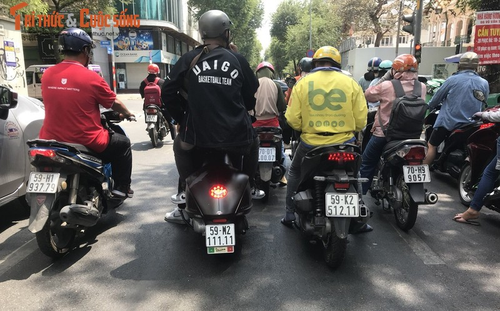

In [5]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.LANCZOS)
display(img)